In [2]:
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
from scipy.stats import binom_test, ttest_1samp

In [3]:
from constants import *

In [4]:
dist_column = 'log pareto front scaling distance'

In [5]:
models_df = pd.read_csv('%s/models.csv' % STATISTICS_DIR, skipinitialspace=True)

# apply log transform to both distance columns
models_df['log pareto front distance'] = pylab.log10(models_df['pareto front distance'])
models_df['log pareto front scaling distance'] = pylab.log10(models_df['pareto front scaling distance'])
models_df

,arbor name,model,pareto front distance,pareto front scaling distance,log pareto front distance,log pareto front scaling distance
0,087_1_C_day4,arbor,2.023704,1.072667,0.306147,0.030465
1,087_1_C_day4,random,87.523951,3.043072,1.942127,0.483312
2,087_1_C_day4,random,111.668084,3.634563,2.047929,0.560452
3,087_1_C_day4,random,83.278267,2.974552,1.920532,0.473422
4,087_1_C_day4,random,77.388023,2.803433,1.888674,0.447690
...,...,...,...,...,...,...
88654,009_2_C_day4,random,57.770116,2.942164,1.761703,0.468667
88655,009_2_C_day4,random,32.007389,2.040848,1.505250,0.309811
88656,009_2_C_day4,random,43.630989,2.397885,1.639795,0.379828
88657,009_2_C_day4,random,39.951146,2.323136,1.601529,0.366075


In [6]:
# create a new data frame with just the arbors, sorted by pareto front distance
arbor_rank_df = models_df[models_df['model'] == 'arbor'].sort_values(by=dist_column)
arbor_rank_df['arbor index'] = range(1, len(arbor_rank_df.index) + 1)
arbor_rank_df = arbor_rank_df[['arbor name', 'arbor index']]
arbor_rank_df

,arbor name,arbor index
21798,261_2_S_day4,1
5922,261_2_S_day3,2
23541,252_3_S_day2,3
11592,169_2_C_day1,4
60372,036_2_S_day4,5
...,...,...
61716,282_2_S_day1,4215
7581,240_1_S_day1,4216
59449,228_2_S_day3,4217
14742,092_2_S_day1,4218


In [7]:
# join the models data frame with the data frame that has arbors sorted by distance
scatter_df = pd.merge(models_df, arbor_rank_df)
scatter_df.sort_values(by='model', ascending=False, inplace=True)
scatter_df

,arbor name,model,pareto front distance,pareto front scaling distance,log pareto front distance,log pareto front scaling distance,arbor index
88658,009_2_C_day4,random,50.972603,2.715645,1.707337,0.433873,2267
56394,076_2_S_day4,random,8.201703,1.605123,0.913904,0.205508,1797
56392,076_2_S_day4,random,19.035873,2.488620,1.279573,0.395959,1797
56391,076_2_S_day4,random,6.167744,1.486593,0.790126,0.172192,1797
56390,076_2_S_day4,random,15.428325,2.184517,1.188319,0.339355,1797
...,...,...,...,...,...,...,...
56320,250_3_S_day2,arbor,0.775846,1.095645,-0.110224,0.039670,3540
56299,211_3_S_day4,arbor,0.217016,1.014424,-0.663508,0.006220,314
56278,173_4_S_day4,arbor,2.136545,1.064391,0.329712,0.027101,2815
56257,229_4_C_day3,arbor,1.402681,1.050421,0.146959,0.021363,2200


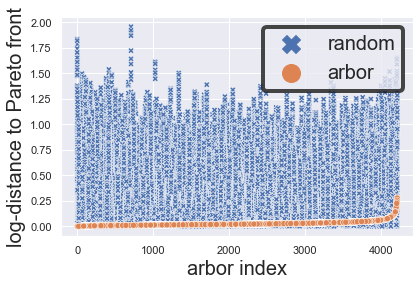

In [9]:
sns.set()
sns.scatterplot(x='arbor index', y=dist_column, hue='model', data=scatter_df,
                style='model', markers={'arbor' : 'o', 'random' : 'X'}, )
leg = pylab.legend(frameon=True, loc='upper right', fontsize=20, edgecolor='k', markerscale=3)
leg.get_frame().set_linewidth(4)
pylab.xlabel('arbor index', size=20)
pylab.ylabel('log-distance to Pareto front', size=20)
pylab.tight_layout()
pylab.savefig('%s/null-models-scatterplot.pdf' % NULL_MODELS_PLOTS_DIR,
              format='pdf')

In [25]:
null_models_df = models_df[models_df['model'] != 'arbor']
null_models_df = null_models_df.rename(columns={'model' : 'null model',
                                                'pareto front distance' : 'null model distance',
                                                'pareto front scaling distance' : 'null model scaling distance',
                                                'log pareto front distance' : 'log null model distance',
                                                'log pareto front distance' : 'log pareto front scaling distance'})
null_models_df

,arbor name,null model,null model distance,null model scaling distance,log pareto front scaling distance,log pareto front scaling distance
1,087_1_C_day4,random,87.523951,3.043072,1.942127,0.483312
2,087_1_C_day4,random,111.668084,3.634563,2.047929,0.560452
3,087_1_C_day4,random,83.278267,2.974552,1.920532,0.473422
4,087_1_C_day4,random,77.388023,2.803433,1.888674,0.447690
5,087_1_C_day4,random,93.436999,3.182372,1.970519,0.502751
...,...,...,...,...,...,...
88654,009_2_C_day4,random,57.770116,2.942164,1.761703,0.468667
88655,009_2_C_day4,random,32.007389,2.040848,1.505250,0.309811
88656,009_2_C_day4,random,43.630989,2.397885,1.639795,0.379828
88657,009_2_C_day4,random,39.951146,2.323136,1.601529,0.366075


In [26]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
scaling_df = scaling_df.drop('pareto front scaling location', axis=1)
scaling_df = scaling_df.rename(columns={'pareto front scaling distance' : 'arbor scaling distance'})
scaling_df

,arbor name,arbor scaling distance
0,087_1_C_day4,1.072667
1,084_2_C_day2,1.036260
2,093_1_C_day2,1.057325
3,078_1_C_day4,1.024057
4,089_3_S_day4,1.041909
...,...,...
4214,065_3_C_day2,1.031211
4215,008_4_S_day5,1.043725
4216,030_3_C_day2,1.067804
4217,028_4_C_day3,1.025459


In [27]:
scaling_df = pd.merge(scaling_df, null_models_df)
scaling_df

,arbor name,arbor scaling distance,null model,null model distance,null model scaling distance,log pareto front scaling distance,log pareto front scaling distance
0,087_1_C_day4,1.072667,random,87.523951,3.043072,1.942127,0.483312
1,087_1_C_day4,1.072667,random,111.668084,3.634563,2.047929,0.560452
2,087_1_C_day4,1.072667,random,83.278267,2.974552,1.920532,0.473422
3,087_1_C_day4,1.072667,random,77.388023,2.803433,1.888674,0.447690
4,087_1_C_day4,1.072667,random,93.436999,3.182372,1.970519,0.502751
...,...,...,...,...,...,...,...
84435,009_2_C_day4,1.051626,random,57.770116,2.942164,1.761703,0.468667
84436,009_2_C_day4,1.051626,random,32.007389,2.040848,1.505250,0.309811
84437,009_2_C_day4,1.051626,random,43.630989,2.397885,1.639795,0.379828
84438,009_2_C_day4,1.051626,random,39.951146,2.323136,1.601529,0.366075


In [28]:
scaling_df['ratio'] = scaling_df['null model scaling distance'] / scaling_df['arbor scaling distance']
scaling_df['null success'] = (scaling_df['ratio'] <= 1).astype(int)
scaling_df

,arbor name,arbor scaling distance,null model,null model distance,null model scaling distance,log pareto front scaling distance,log pareto front scaling distance,ratio,null success
0,087_1_C_day4,1.072667,random,87.523951,3.043072,1.942127,0.483312,2.836921,0
1,087_1_C_day4,1.072667,random,111.668084,3.634563,2.047929,0.560452,3.388342,0
2,087_1_C_day4,1.072667,random,83.278267,2.974552,1.920532,0.473422,2.773043,0
3,087_1_C_day4,1.072667,random,77.388023,2.803433,1.888674,0.447690,2.613517,0
4,087_1_C_day4,1.072667,random,93.436999,3.182372,1.970519,0.502751,2.966785,0
...,...,...,...,...,...,...,...,...,...
84435,009_2_C_day4,1.051626,random,57.770116,2.942164,1.761703,0.468667,2.797728,0
84436,009_2_C_day4,1.051626,random,32.007389,2.040848,1.505250,0.309811,1.940660,0
84437,009_2_C_day4,1.051626,random,43.630989,2.397885,1.639795,0.379828,2.280169,0
84438,009_2_C_day4,1.051626,random,39.951146,2.323136,1.601529,0.366075,2.209090,0


In [36]:
scaling_df['ratio'].mean(), "+/-", scaling_df['ratio'].std(ddof=1)

(3.149292945761775, '+/-', 2.5961389352120063)

In [38]:
ttest_1samp(scaling_df['ratio'], 1)

Ttest_1sampResult(statistic=240.5701810875828, pvalue=0.0)

In [31]:
scaling_df['null success'].mean()

0.013891520606347702

In [44]:
binom_test(scaling_df['null success'].sum(), len(scaling_df['null success']))

1e-323